# Vanilla Gradient Descent

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fx(x):
    return x**2

In [3]:
x_range = np.linspace(-1, 1, 100)
y_value = [fx(x) for x in x_range]

Text(0.5, 1.0, 'f(x) = $x^2$')

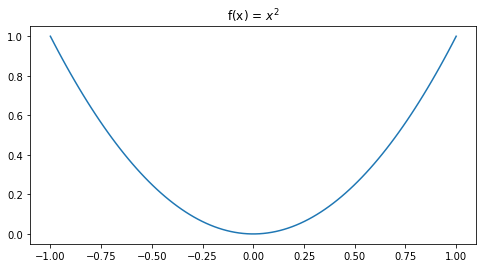

In [4]:
plt.figure(figsize=[8, 4])
plt.plot(x_range, y_value)
plt.title("f(x) = $x^2$")

In [5]:
def gd(init_x, grad_fn, lr=0.01, n_iter=10):
    x = init_x
    x_list = [x]
    for i in range(n_iter):
        x -= lr*grad_fn(x)
        x_list.append(x)
    return x_list

In [6]:
init_x = -1
grad_fn = lambda x: 2*x

x_list = gd(init_x, grad_fn, lr=0.02, n_iter=100)

Text(0.5, 1.0, 'f(x) = $x^2$')

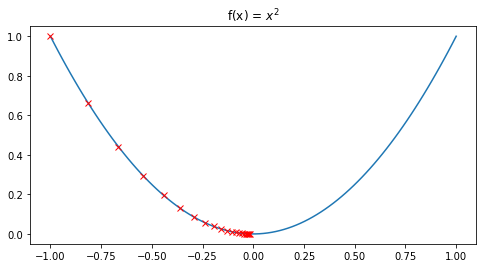

In [7]:
x_list_sample = x_list[::5]
y_list_sample = [fx(x) for x in x_list_sample]

plt.figure(figsize=[8, 4])
plt.plot(x_range, y_value)
plt.plot(x_list_sample, y_list_sample, 'rx')
plt.title("f(x) = $x^2$")

Minimise function with parameters
---
$$ f(x) = ax + b$$
$$ (y - f(x))^2 = (y - (ax+b))^2$$
Gradient:
$$ \frac{dy}{da} = -2x(y - (ax+b))$$
$$ \frac{dy}{db} = -2(y - (ax+b))$$

In [58]:
def fx2(x):
    return 2*x + 3

In [94]:
x_range = np.linspace(-1, 1, 100)
y_value = [fx2(x) for x in x_range]

In [95]:
def gd2(inits, X, Y, lr=0.01, n_iter=10):
    n = len(X)
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        for j in range(n):
            x_j, y_j = X[j], Y[j]
            a -= lr*grad_a(x_j, y_j)
            b -= lr*grad_b(x_j, y_j)
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list

In [96]:
inits = [0, 0]
a_list, b_list = gd2(inits, x_range, y_value, n_iter=10)

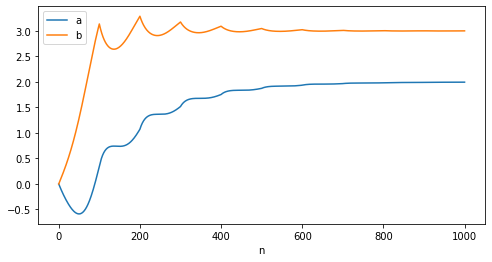

In [98]:
plt.figure(figsize=[8, 4])
plt.plot(range(len(a_list)), a_list, label="a")
plt.plot(range(len(b_list)), b_list, label="b")
plt.xlabel("n")
plt.legend()

### Batch Gradient Update
Update on batch average
$$ \frac{dy}{da} = \frac{1}{N}\sum-2x(y - (ax+b))$$
$$ \frac{dy}{db} = \frac{1}{N}\sum-2(y - (ax+b))$$

In [81]:
def gd3(inits, X, Y, lr=0.01, n_iter=10):
    n = len(X)
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        grad_sum_a = 0
        grad_sum_b = 0
        for j in range(n):
            x_j, y_j = X[j], Y[j]
            grad_sum_a += grad_a(x_j, y_j)
            grad_sum_b += grad_b(x_j, y_j)
        a -= lr*grad_sum_a/n
        b -= lr*grad_sum_b/n
        a_list.append(a)
        b_list.append(b)
    return a_list, b_list

In [99]:
inits = [0, 0]
a_list, b_list = gd3(inits, x_range, y_value, lr=0.1, n_iter=100)

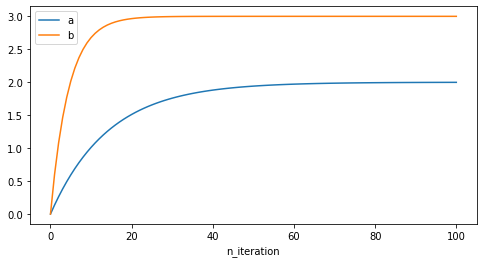

In [100]:
plt.figure(figsize=[8, 4])
plt.plot(range(len(a_list)), a_list, label="a")
plt.plot(range(len(b_list)), b_list, label="b")
plt.xlabel("n_iteration")
plt.legend()